# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

Extracting data...Hdn_objn30.jpg, Mda_archi42.jpg, Hda_obj76.jpg, Hda_obj25.jpg, Bda_art1271.jpg, Mda_art7.jpg, Mda_art1312.jpg, Fda_A698003.jpg, Hda_obj96.jpg, Mda_art376.jpg, Fdn_land317.jpg, Mda_art1517.jpg, Hdn_objn44.jpg, Mdn_N347014.jpg, Bdn_N44099.jpg, Fdn_nat1215.jpg, Hda_obj88.jpg, Hda_room431.jpg, Fda_A463059.jpg, Bda_art1152.jpg, Bdn_nat219.jpg, Bdn_N44094.jpg, Hdn_objn137.jpg, Fda_A244068.jpg, Fdn_natu408.jpg, Fda_art1464.jpg, Hdn_objn23.jpg, Fda_gre536.jpg, Bda_art1147.jpg, Mdn_land750.jpg, Fda_A463036.jpg, Hda_obj65.jpg, Mda_urb447.jpg, Bda_art1168.jpg, Hdn_objn47.jpg, Hda_int888.jpg, Mda_art600.jpg, Fda_obj230.jpg, Hdn_N124055.jpg, Mdn_natu172.jpg, Mdn_natu412.jpg, Hda_obj105.jpg, Fdn_nat1251.jpg, Fda_A219084.jpg, Mda_urb276.jpg, Hdn_natu337.jpg, Mda_archi277.jpg, Mdn_land743.jpg, Hda_obj7.jpg, Fda_A223024.jpg, Fdn_land13.jpg, Fdn_nat1238.jpg, Mdn_N251013.jpg, Bda_art1156.jpg, Hda_obj298.jpg, Mda_art475.jpg, Bdn_text121.jpg, Hdn_o

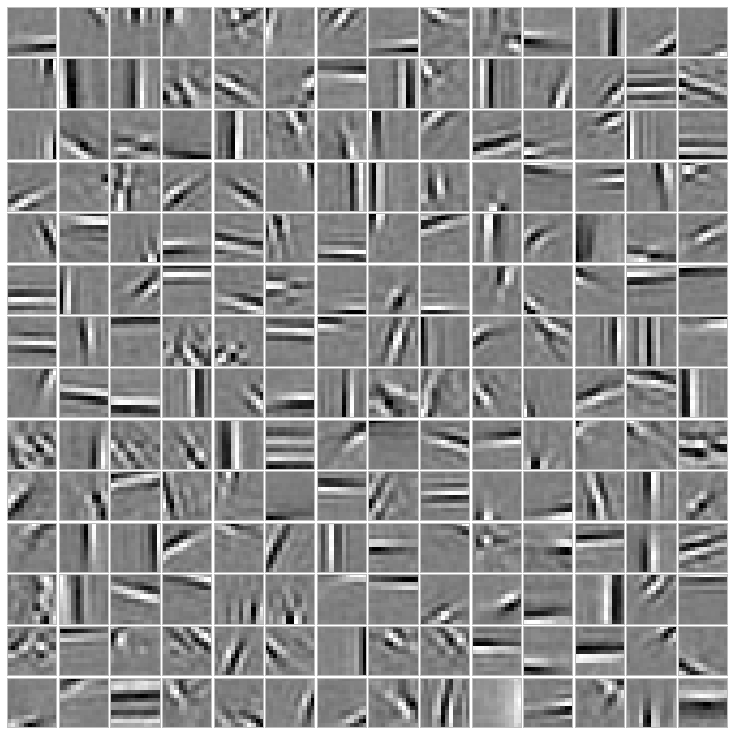

In [4]:
from shl_scripts import SHL
shl = SHL()
dico = shl.learn_dico()
_ = shl.show_dico(dico)

## Version used

In [5]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 2.7.10 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 4.0.0
OS Darwin 15.0.0 x86_64 i386 64bit
numpy 1.10.1
Wed Oct 28 12:38:36 2015 CET